# Assignment 4 - CNN
Author: Soham Vaishnav\
Roll No.: 2022112002

## Importing required libraries

In [1]:
import numpy as np
from plotly import express as px
from plotly import subplots as sp
from plotly import graph_objects as go
from matplotlib import pyplot as plt
import pandas as pd
import sys
import os
import wandb

import cv2

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import torchvision
from torch.utils.data import random_split
from torch.utils.data import DataLoader

import torchvision.transforms as transforms

## Setting up paths

In [2]:

AssignDIR = os.path.dirname(os.path.dirname(os.path.abspath('CNN.ipynb')))
CurrDIR = os.path.dirname(os.path.abspath('CNN.ipynb'))
UserDIR = os.path.dirname(AssignDIR)

sys.path.append(UserDIR)

RawDataDIR = os.path.join(UserDIR, "./data/external/")
PreProcessDIR = os.path.join(UserDIR, "./data/interim/4/")

from utils_4 import *
from models.cnn import cnn
from models.cnn import multilabel_cnn

## Dataloading

In [3]:
dataloader = MultiMNISTDataset(32)
dataloader.load_mnist_data('num_digits')

## Visualising the Dataset

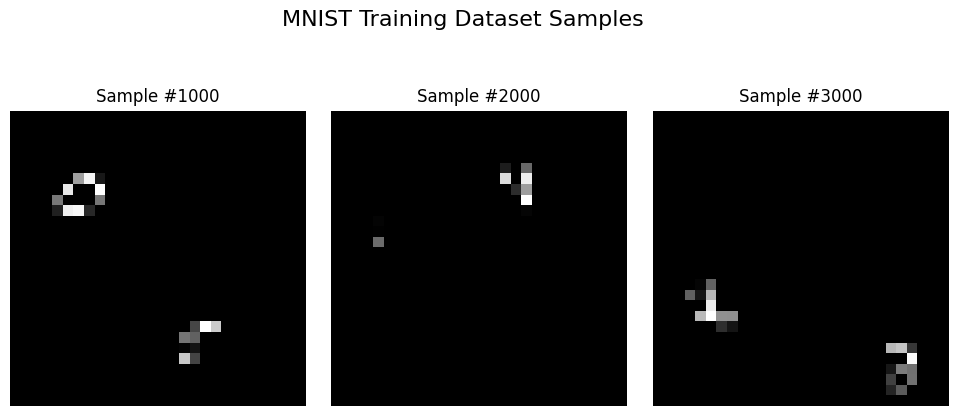

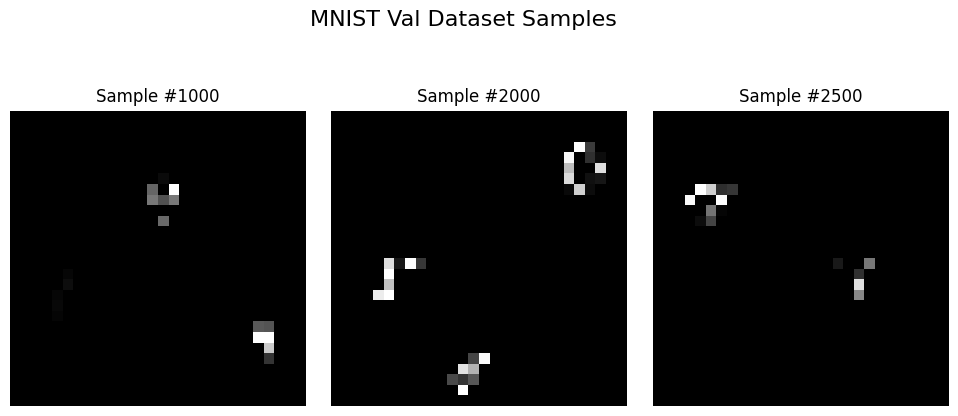

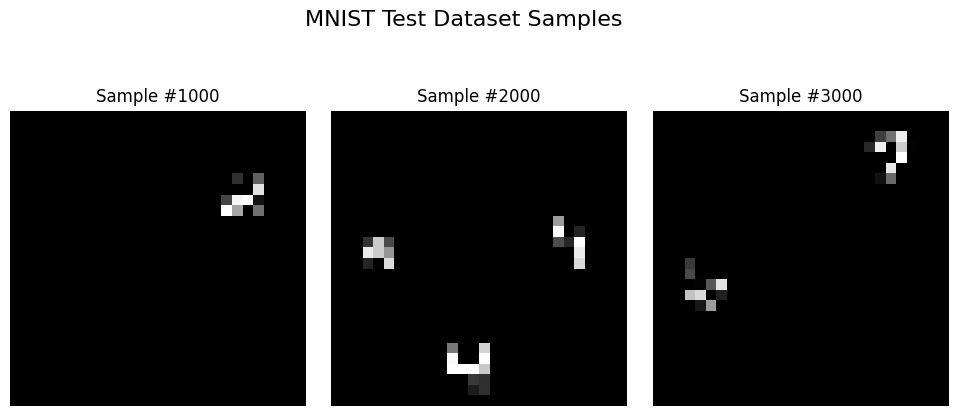

In [4]:
fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Training Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._train_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._train_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._train_images[3000], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Val Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._valid_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._valid_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(2500))
ax.axis('off')
plt.imshow(dataloader._valid_images[2500], cmap='gray')
plt.show()

fig = plt.figure(figsize=(10, 5))
fig.suptitle('MNIST Test Dataset Samples', fontsize=16)
ax = plt.subplot(1, 3, 1)
plt.tight_layout()
ax.set_title('Sample #{}'.format(1000))
ax.axis('off')
plt.imshow(dataloader._test_images[1000], cmap='gray')
ax = plt.subplot(1, 3, 2)
ax.set_title('Sample #{}'.format(2000))
ax.axis('off')
plt.imshow(dataloader._test_images[2000], cmap='gray')
ax = plt.subplot(1, 3, 3)
ax.set_title('Sample #{}'.format(3000))
ax.axis('off')
plt.imshow(dataloader._test_images[3000], cmap='gray')
plt.show()

In [5]:
print(dataloader._train_images[0].shape)

(28, 28)


## Initialising the model

In [6]:
config_model = {'task': [], 'in_channels': [], 'ConvLayers': [], 'FCLayers': [], 'pool': [], 
                'kernel_size': [], 'strides': [], 'activation': [], 'dropout': []}

config_trainer = {'model': [], 'loss': [], 'epochs': [], 'batch_size': [], 'learning_rate': [], 
                  'optimizer': [], 'wandb': False, 'labels': [], 'labelsRnum': True}

In [15]:
config_model['task'] = 'classification'
config_model['in_channels'] = 1
config_model['ConvLayers'] = [32, 10]
config_model['FCLayers'] = [10*28*28, 512, 4]
config_model['kernel_size'] = [3, 3, 3]
config_model['strides'] = [1, 1, 1]
config_model['pool'] = None
config_model['activation'] = 'relu'
config_model['dropout'] = 0.5

model = cnn.CNN(config_model)

config_trainer['model'] = model
config_trainer['loss'] = 'cross_entropy'
config_trainer['epochs'] = 10
config_trainer['batch_size'] = 64
config_trainer['learning_rate'] = 0.001
config_trainer['optimizer'] = optim.Adam(model.parameters(), lr=config_trainer['learning_rate'])
config_trainer['wandb'] = False
config_trainer['labels'] = dataloader.getLabels()
config_trainer['labelsRnum'] = True

trainer = cnn.Model_trainer(config_trainer)
trainer.trainer(dataloader._train_images, dataloader._train_labels, dataloader._valid_images, dataloader._valid_labels, 10)
# trainer.evaluate(dataloader._test_images, dataloader._test_labels, True)

Epoch:  0
Acc =  0.74060684
Acc =  0.7768807
Epoch:  1
Acc =  0.7905185
Acc =  0.8224734
Epoch:  2
Acc =  0.84129125
Acc =  0.89660907
Epoch:  3
Acc =  0.84605014
Acc =  0.8962291
Epoch:  4
Acc =  0.90117383
Acc =  0.93351066
Epoch:  5
Acc =  0.92584074
Acc =  0.94714093
Epoch:  6
Acc =  0.9380552
Acc =  0.9517952
Epoch:  7
Acc =  0.9367862
Acc =  0.9494681
Epoch:  8
Acc =  0.961453
Acc =  0.96143615
Epoch:  9
Acc =  0.98445433
Acc =  0.9797208
